# Discover the strength of monotonic relation

## Finding Spearman’s rank correlation coefficient using Python for IB Diploma Mathematics


In this article, I will show the necessary steps using Python to find Spearman's rank correlation coefficient.

Spearman's rank correlation uses ordinal data. Examples of ordinal data are:

- 1st, 2nd, 3rd, 
- Small, Medium, Large, XL,
- Strongly agree, Agree, Neutral, Disagree, Strongly Disagree
- Very often, Often, Not Often, Not at all

Spearman's rank correlation coefficient, $r_s$ shows the correlation between two ordinal data how one ordinal data increases or decreases as the other ordinal increases which are described as "monotonic". 

$$r_s=1-\frac{6\sum d^2}{n(n^2-1)}$$

This formla is an alternative to Pearson's correlation if the the data are ordinal and monotonic and if there are no ties in data.

A value of 1 means the set of data is strictly increasing and the value of -1 means it is strictly decreasing. A value of 0 means that data shows no monotonic behavior. the Spearman correlation between two variables will be high when an observation has a similar rank between the two variables.

You can find all the code from this [link](http://bit.ly/2YHF5G8).

Let's start.

We need to import necessary libraries.

In [1]:
# https://gist.github.com/shinokada/574f639d4f07ed1388abd8f24f6936a4

from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import spearmanr

# Example of the Spearman's Rank Correlation Test using two sets of list.

Let's find how the correlation of the rank at 5km relate to the rank of 10km run.

In [2]:
# https://gist.github.com/shinokada/62fc538f01252f765bdf789a0efa80d6

fivekm = [1,2,3,4,5,6,7]
tenkm=[3,2,1,5,7,4,6]
rs, pval = spearmanr(fivekm, tenkm)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
if pval < 0.05:
	print('At 5% level of significance, the final rankings is significant or dependent')
else:
	print('At 5% level of significance, the final rankings is not significant or independent')

rs=0.678571, p-value=0.093750
At 5% level of significance, the final rankings is not significant or independent


p-value is the level of significance. It determines the probability that the correlation happened by chance.


# Example using Pandas dataframe.

In [3]:
# https://gist.github.com/shinokada/83b2d7cd47e4fc1993d50400570e1b36

race = pd.DataFrame(
    [
        [1,3],
        [2,2],
        [3,1],
        [4,5],
        [5,7],
        [6,4],
        [7,6]
    ],
    columns=["After 5km","End of race"])
race

,After 5km,End of race
0,1,3
1,2,2
2,3,1
3,4,5
4,5,7
5,6,4
6,7,6


## Plotting data

Let's plot this data using Pandas plot().

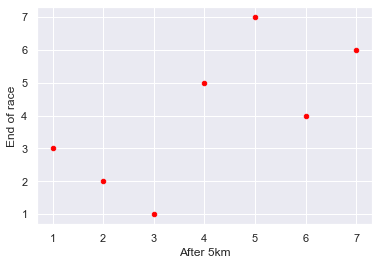

In [4]:
# https://gist.github.com/shinokada/e491ca766909d2627f254bc55f6b1bf9

race.plot.scatter(x='After 5km',y='End of race',c='red')

We can plot using Seaborn to add color.

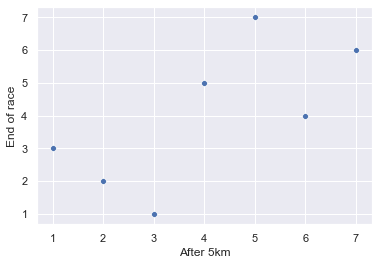

In [5]:
# https://gist.github.com/shinokada/6582b922f8a11af08f1fbe6af84f076f

sns.scatterplot(x='After 5km',y='End of race',data=race)

We find $r_s$ and p-value from pandas dataframe.

In [6]:
# https://gist.github.com/shinokada/cc6039ce789f594a134b644ce9afebcd 

rs, pval = spearmanr(race)
print('rs=%.6f, p-value=%.6f' % (rs, pval))

rs=0.678571, p-value=0.093750


Now we create another dataframe using Pandas. Using `spearmanr`, you don't need to change your raw data to the ordinal data. 

   Set of A  Set of B
0         3         4
1         5         4
2         6         2
3         6         4
4         8         9
5        11         7
rs=0.585239, p-value=0.222365


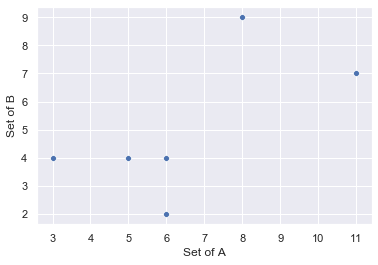

In [7]:
# https://gist.github.com/shinokada/2a67199e68bc08535d6eb278fde199ac

rawdata = pd.DataFrame(
    [
        [3,4],
        [5,4],
        [6,2],
        [6,4],
        [8,9],
        [11,7]
    ],
    columns=['Set of A','Set of B'])
print(rawdata)
rs, pval = spearmanr(rawdata)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
sns.scatterplot(x='Set of A',y='Set of B',data=rawdata)

Manually rank the above data to the ordinal data. Finding the $r_s$ and p-value. This shows the exactly the same result as finding them from the raw data.

   Ranking of A  Ranking of B
0           1.0             3
1           2.0             3
2           3.5             1
3           3.5             3
4           5.0             6
5           6.0             5
rs=0.585239, p-value=0.222365


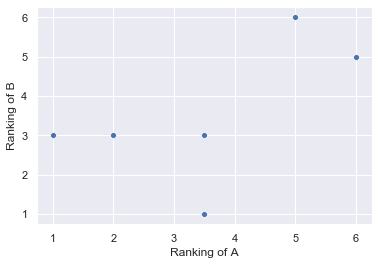

In [8]:
# https://gist.github.com/shinokada/768b2b6f1c2bce8790c6ccf68187e0e9

ordinaldata = pd.DataFrame(
    [
        [1.0,3],
        [2.0,3],
        [3.5,1],
        [3.5,3],
        [5.0,6],
        [6.0,5]
    ],
    columns=['Ranking of A','Ranking of B'])
print(ordinaldata)
rs, pval = spearmanr(ordinaldata)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
sns.scatterplot(x='Ranking of A',y='Ranking of B',data=ordinaldata)

A value of 1 means the set of data is strictly increasing. The rank do not change. p-value is 0 in this case.

rs=1.000000, p-value=0.000000


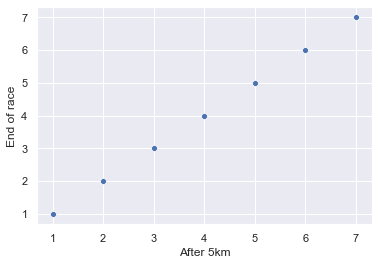

In [9]:
# https://gist.github.com/shinokada/318d5d1eb9a7981f003447ee19adaca6

race2 = pd.DataFrame(
    [
        [1,1],
        [2,2],
        [3,3],
        [4,4],
        [5,5],
        [6,6],
        [7,7]
    ],
    columns=['After 5km','End of race'])
rs, pval = spearmanr(race2)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
sns.scatterplot(x='After 5km',y='End of race',data=race2)

The value of -1 means it is strictly decreasing. The rank is in a reversal order.

rs=-1.000000, p-value=0.000000


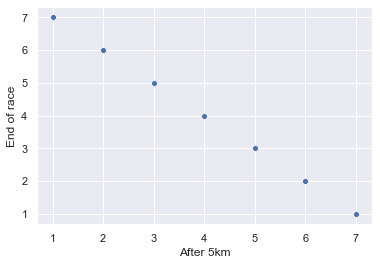

In [10]:
# https://gist.github.com/shinokada/817f920c45bd3f983ca9bd6ed2dd1838

race3 = pd.DataFrame(
    [
        [1,7],
        [2,6],
        [3,5],
        [4,4],
        [5,3],
        [6,2],
        [7,1]
    ],
    columns=['After 5km','End of race'])
rs, pval = spearmanr(race3)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
sns.scatterplot(x='After 5km',y='End of race',data=race3)

No monotonic behavior gives the value of 0.

rs=0.000000, p-value=1.000000


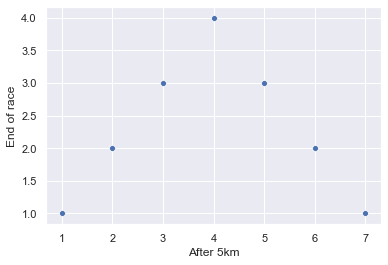

In [11]:
# https://gist.github.com/shinokada/3c5f78acda90a402288d75b8c795953b

race4 = pd.DataFrame(
    [
        [1,1],
        [2,2],
        [3,3],
        [4,4],
        [5,3],
        [6,2],
        [7,1]
    ],
    columns=['After 5km','End of race'])
rs, pval = spearmanr(race4)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
sns.scatterplot(x='After 5km',y='End of race',data=race4)

# Importing a CSV file

We will use data from BIXI Montréal is a public bicycle sharing system serving Montréal, Quebec, Canada. It is a big file so it takes time to process data.

In [12]:
# https://gist.github.com/shinokada/38870816b84774930b56aea3ba4077b3

rides = pd.read_csv('https://raw.githubusercontent.com/shinokada/python-for-ib-diploma-mathematics/master/Data/OD_2019-05.csv')
print(rides.shape)
print(rides.head())

(790323, 6)
            start_date  start_station_code             end_date  \
0  2019-05-01 00:00:19                6902  2019-05-01 00:16:24   
1  2019-05-01 00:00:33                6171  2019-05-01 00:06:05   
2  2019-05-01 00:01:12                6073  2019-05-01 00:29:27   
3  2019-05-01 00:01:17                6080  2019-05-01 00:09:34   
4  2019-05-01 00:01:23                6411  2019-05-01 00:04:49   

   end_station_code  duration_sec  is_member  
0              6387           965          1  
1              6112           331          1  
2              6331          1694          1  
3              6080           497          1  
4              6012           206          1  


There are more than seventy nine thousand of lines with six columns. Columns are start_data, start_station_code, end_date, end_station_code, duration_sec and is_member.

We group by end_station_code and sum the duration_sec. We assign n_rides with the number of end_station_code.

In [13]:
# https://gist.github.com/shinokada/9a87dfffe5d552894884abb24cc0a4d8

by_end_station = (
    rides
        .loc[:, ['end_station_code', 'duration_sec']]
        .groupby('end_station_code')
        .sum()
        .assign(n_rides=rides['end_station_code'].value_counts())
)
print(by_end_station.head())

                  duration_sec  n_rides
end_station_code                       
4000                   1498612     1754
4001                    181712      152
4002                    884874      894
5002                    195657      144
5003                     95648       83


# Plotting imported data

We use seaborn's [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to plot our imported data. We set labels of the x-axis and y-axis and call the data. 

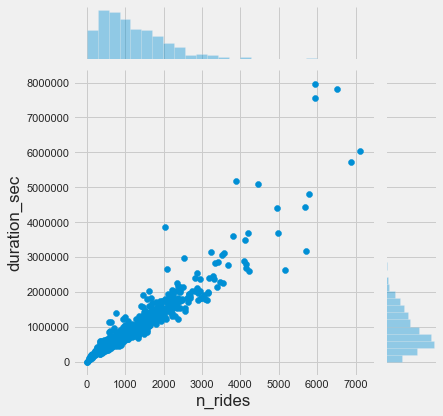

In [14]:
# https://gist.github.com/shinokada/674f1dd88b9570a1101f61a19b669509

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

sns.jointplot(x='n_rides', y='duration_sec', data=by_end_station)

# Ranking data

Please note that the majority of data are on the lower end. We can use `scipy.stats.rankdata` to see the data by ranking.

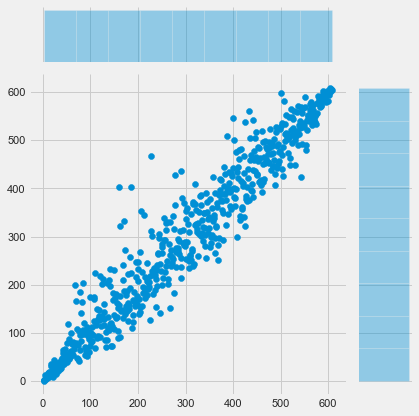

In [15]:
# https://gist.github.com/shinokada/a00fb4482a6d9729e898fb496fc74989

from scipy.stats import rankdata
sns.jointplot(x=rankdata(by_end_station['n_rides']), y=rankdata(by_end_station['duration_sec']))

Let's find the Spearman's $R_s$.

In [16]:
# https://gist.github.com/shinokada/af1c1ff0d722a779c95766b8983e5f98

rs, pval = spearmanr(by_end_station)
print('rs=%.6f' % (rs))

rs=0.964881


The number of rides at a bike stop is almost totally predictive of the number of commuter seconds spend riding it.

# Examples to use Spearman's correlation are:

- [IQ of a person with the number of hours spent on games](https://www.wikiwand.com/en/Spearman%27s_rank_correlation_coefficient)

- [Free university meals and their CGPA scores](https://www.toppr.com/guides/business-mathematics-and-statistics/correlation-and-regression/rank-correlation/)

- [Physics and Math ranks](https://www.statisticshowto.datasciencecentral.com/spearman-rank-correlation-definition-calculate/)

# Reference

- To compare the Spearman correlation and the Pearson correlation, please read [A comparison of the Pearson and Spearman correlation here](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) 

- https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php

- https://www.kaggle.com/residentmario/spearman-correlation-with-montreal-bikes/data

- https://seaborn.pydata.org/generated/seaborn.jointplot.html